# Data Preprocessing

This notebook focuses on importing the data and turning it into MFCCs for the model to learn from. This approach is discussed more in blog week 5.

Librosa is a python package for manipulating data. It includes several useful functions, including being able to manipulate audio data into MFCCs or Spectrographs. Numpy is used to create large arrays to load the data into.

In [2]:
import librosa
import numpy as np

The code below will read in a file, and convert it to and MFCC using Librosa.

In [3]:
file_name = "../Datasets/final/eval_balanced/Emergency/1.wav"
audio, sample_rate = librosa.load(file_name)

In [4]:
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 235)


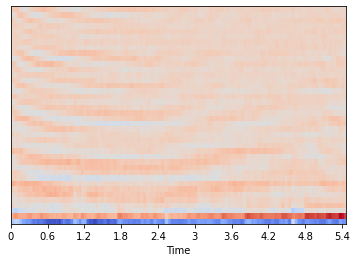

In [5]:
import librosa.display

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [6]:
import IPython.display
from IPython.display import Audio
Audio(file_name)

## Get MFCC for every file

Create a function which will extract the features for a file given. Then create a loop that will go through every file, label it as emergency or non-emergency and add it to a list. Then turn this list into a Pandas DataFrame for the model to use.

In [ ]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled=np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error on file: ", file_name, " Exception is: " , e)
        return None
    return mfccsscaled


x = extract_features('../Datasets/final/train_balanced/nonEmergency/30.wav')

In [ ]:
import pandas as pd
import os

In [17]:
emergency_train_dataset_path = '../Datasets/final/train_balanced/Emergency/'
non_emergency_train_dataset_path = '../Datasets/final/train_balanced/nonEmergency/'

features = []

# Loop through all the data and append the MFCC to a list

for file_name in os.listdir(emergency_train_dataset_path):
    class_label = "emergency"
    data = extract_features(emergency_train_dataset_path + file_name)
    features.append([data, class_label])
    
for file_name in os.listdir(non_emergency_train_dataset_path):
    class_label = "nonEmergency"
    data = extract_features(non_emergency_train_dataset_path + file_name)
    features.append([data,class_label])
    
featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'])

print("Finished feature extraction from ", len(featuresdf), ' files')

/opt/miniconda3/envs/FYP/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error on file:  ../Datasets/final/train_balanced/nonEmergency/.DS_Store  Exception is:  
Finished feature extraction from  1791  files


In [30]:
test_emergency_train_dataset_path = '../Datasets/final/eval_balanced/Emergency/'
test_non_emergency_train_dataset_path = '../Datasets/final/eval_balanced/nonEmergency/'

test_features = []

# Loop through all the data and append the MFCC to a list

for file_name in os.listdir(test_emergency_train_dataset_path):
    class_label = "emergency"
    data = extract_features(test_emergency_train_dataset_path + file_name)
    test_features.append([data, class_label])
    
for file_name in os.listdir(test_non_emergency_train_dataset_path):
    class_label = "nonEmergency"
    data = extract_features(test_non_emergency_train_dataset_path + file_name)
    test_features.append([data,class_label])
    
test_featuresdf = pd.DataFrame(test_features, columns=['feature', 'class_label'])

print("Finished feature extraction from ", len(test_featuresdf), ' files')

/opt/miniconda3/envs/FYP/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error on file:  ../Datasets/final/eval_balanced/Emergency/.DS_Store  Exception is:  
Finished feature extraction from  240  files


## Convert the data

Convert the data into a numpy array as well as the labels so the ML model can understand it. Store the data for use of training the model in another notebook.

In [25]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

x_train = np.array(featuresdf.feature.tolist())
y_train = np.array(featuresdf.class_label.tolist())

x_test = np.array(test_featuresdf.feature.tolist())
y_test = np.array(test_featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y_train))

/opt/miniconda3/envs/FYP/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/opt/miniconda3/envs/FYP/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [26]:
%store x_train
%store y_train
%store x_test
%store y_test

%store yy

Stored 'x_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
